In [26]:

!pip install cufflinks
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing



In [2]:
df=pd.read_csv("C:\\Users\\ABHI\\OneDrive\\Desktop\\classes\\3rd sem\\304 - Healthcare Analytics\Project\StutterData.csv")
df

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,SeverityAfterTherapy,FPMAT
0,1,33.0,male,Business,3,6,3,2,4,1,4
1,2,26.0,female,IT,2,4,2,3,7,0,2
2,3,22.0,male,Student,1,2,1,3,1,0,1
3,4,22.0,male,Student,1,2,1,3,6,0,0
4,5,25.0,male,Student,1,2,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1129,1130,28.0,male,IT,2,5,2,3,5,1,1
1130,1131,28.0,male,IT,2,5,2,3,4,1,3
1131,1132,44.0,male,Business,3,5,3,2,2,1,4
1132,1133,28.0,male,IT,2,5,2,3,2,1,1


In [3]:
df.head(5)

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,SeverityAfterTherapy,FPMAT
0,1,33.0,male,Business,3,6,3,2,4,1,4
1,2,26.0,female,IT,2,4,2,3,7,0,2
2,3,22.0,male,Student,1,2,1,3,1,0,1
3,4,22.0,male,Student,1,2,1,3,6,0,0
4,5,25.0,male,Student,1,2,1,0,1,0,1


In [4]:
df.tail(5)

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,SeverityAfterTherapy,FPMAT
1129,1130,28.0,male,IT,2,5,2,3,5,1,1
1130,1131,28.0,male,IT,2,5,2,3,4,1,3
1131,1132,44.0,male,Business,3,5,3,2,2,1,4
1132,1133,28.0,male,IT,2,5,2,3,2,1,1
1133,1134,22.0,male,Student,1,1,1,3,5,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            1134 non-null   int64  
 1   Age                   1134 non-null   float64
 2   Gender                1134 non-null   object 
 3   Profession            1134 non-null   object 
 4   AnxietyLevel          1134 non-null   int64  
 5   SFPM                  1134 non-null   int64  
 6   Severity              1134 non-null   int64  
 7   SSI-3                 1134 non-null   int64  
 8   MOT                   1134 non-null   int64  
 9   SeverityAfterTherapy  1134 non-null   int64  
 10  FPMAT                 1134 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 97.6+ KB


In [6]:
df.describe()

,Patient ID,Age,AnxietyLevel,SFPM,Severity,SSI-3,MOT,SeverityAfterTherapy,FPMAT
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,563.682540,24.664727,1.477072,3.186949,1.444444,2.186949,3.670194,0.422399,1.318342
std,331.109624,5.429454,0.708605,1.871976,0.658973,1.087669,2.305573,0.494159,1.240704
min,0.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,272.250000,21.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,567.500000,24.000000,1.000000,2.000000,1.000000,3.000000,4.000000,0.000000,1.000000
75%,850.750000,27.000000,2.000000,4.000000,2.000000,3.000000,6.000000,1.000000,1.750000
max,1134.000000,50.000000,3.000000,11.000000,3.000000,3.000000,9.000000,1.000000,6.000000


In [7]:
df.isna().sum()

Patient ID              0
Age                     0
Gender                  0
Profession              0
AnxietyLevel            0
SFPM                    0
Severity                0
SSI-3                   0
MOT                     0
SeverityAfterTherapy    0
FPMAT                   0
dtype: int64

In [8]:
df.corr()['SeverityAfterTherapy'].sort_values(ascending=False)

SeverityAfterTherapy    1.000000
Patient ID              0.701129
SFPM                    0.353455
FPMAT                   0.349118
Age                     0.276196
AnxietyLevel            0.273437
Severity                0.249659
SSI-3                   0.028658
MOT                    -0.202210
Name: SeverityAfterTherapy, dtype: float64

<AxesSubplot:>

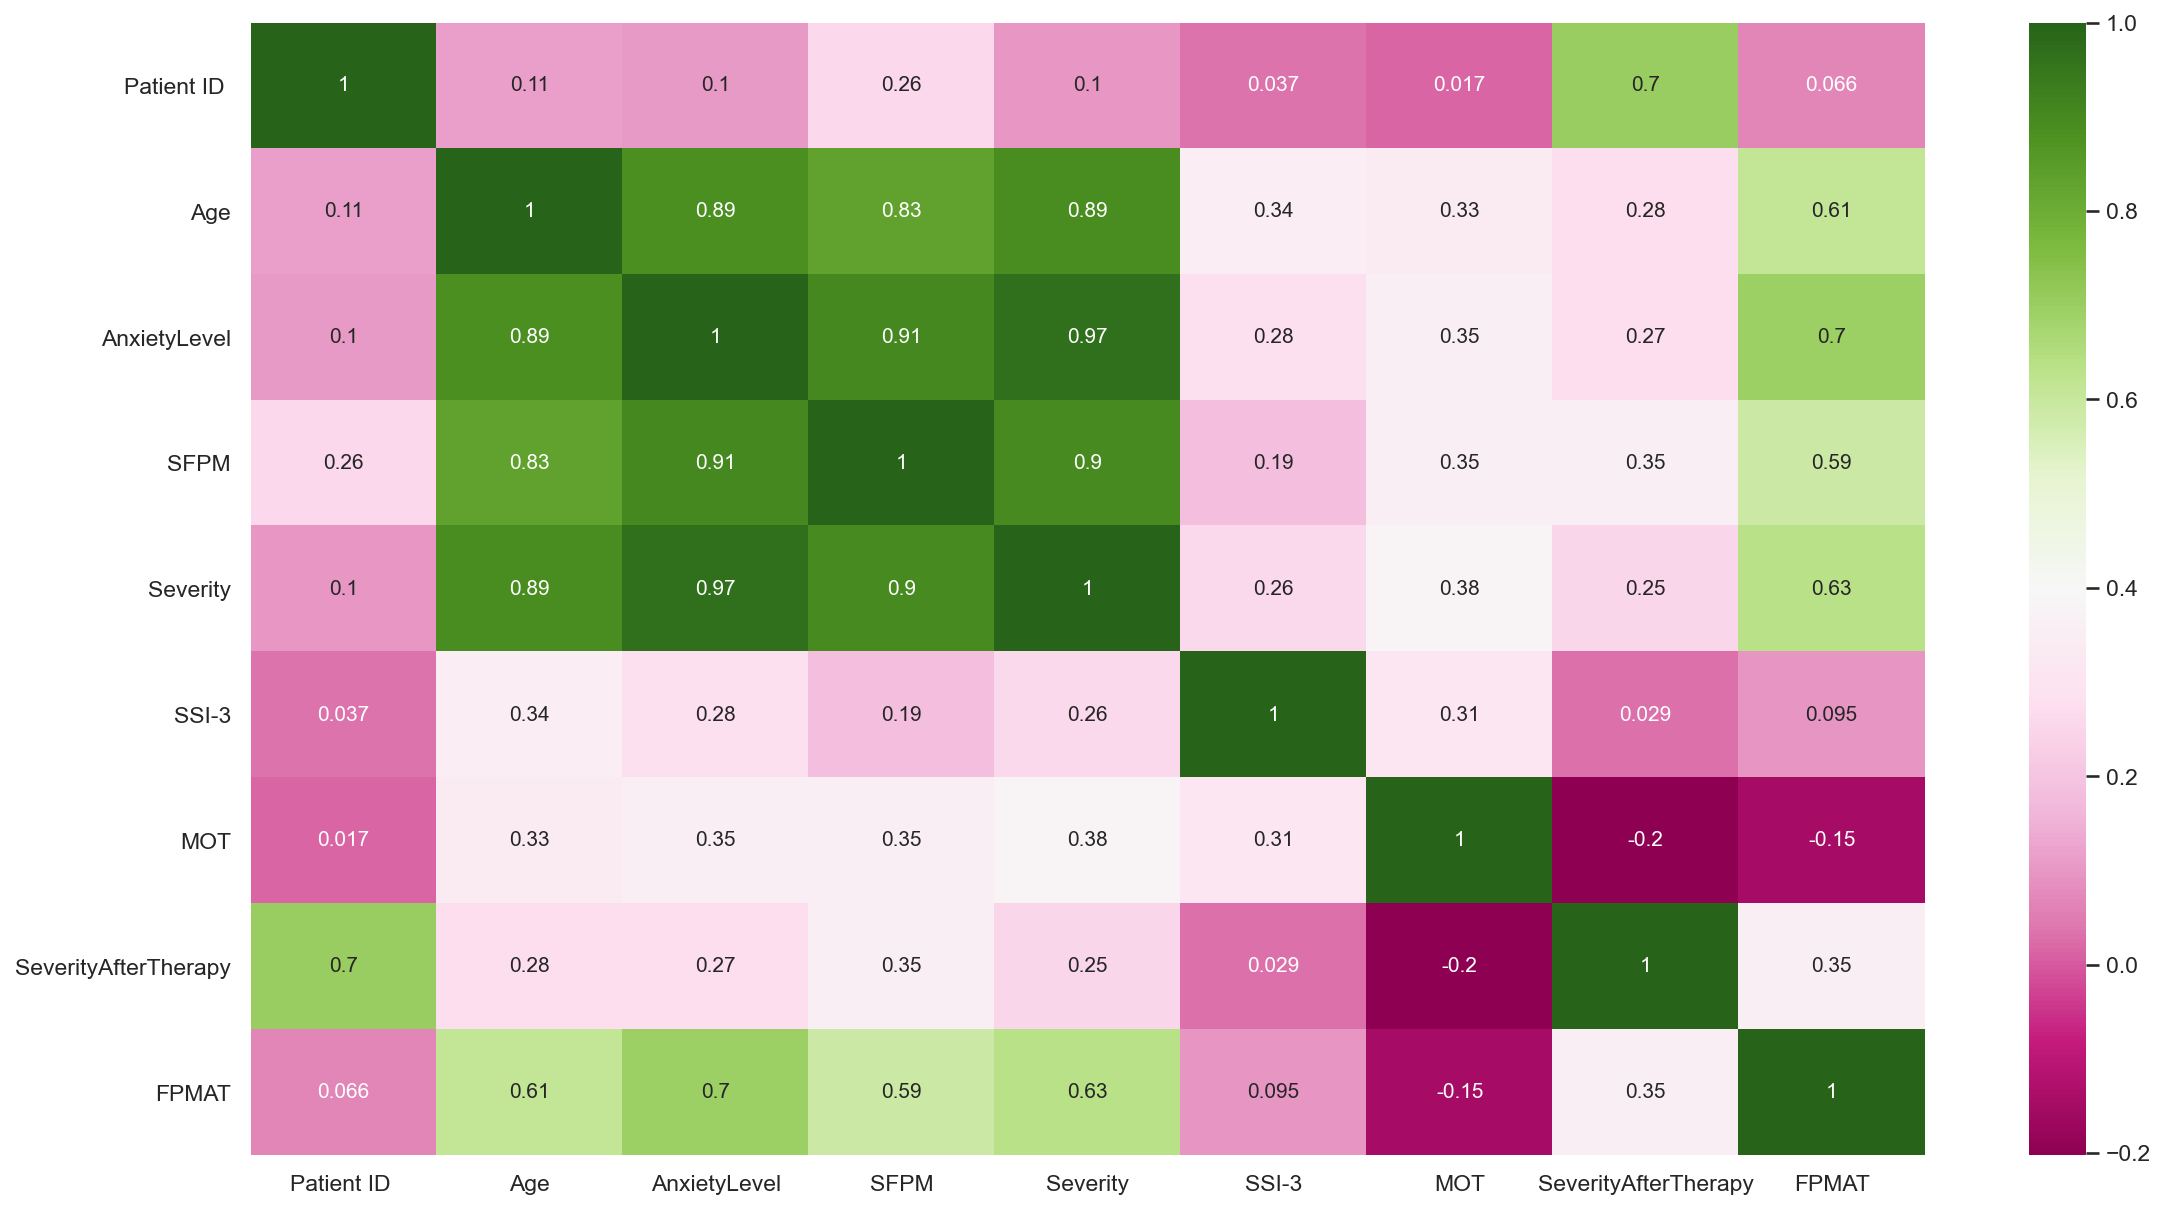

In [9]:
plt.figure(figsize=(18,10),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

In [10]:
df.dtypes

Patient ID                int64
Age                     float64
Gender                   object
Profession               object
AnxietyLevel              int64
SFPM                      int64
Severity                  int64
SSI-3                     int64
MOT                       int64
SeverityAfterTherapy      int64
FPMAT                     int64
dtype: object

In [11]:
num_col =[]
for col in df:
    if df[col].dtype !='object':
        num_col.append(col)
num_col.remove('FPMAT')

In [12]:
cat_col = []
for col in df:
    if df[col].dtype == 'object':
        cat_col.append(col)

In [13]:
print('Numerical Column: ',num_col)
print('Categorical Column',cat_col)

Numerical Column:  ['Patient ID ', 'Age', 'AnxietyLevel', 'SFPM', 'Severity', 'SSI-3', 'MOT', 'SeverityAfterTherapy']
Categorical Column ['Gender', 'Profession']


In [14]:
df[num_col].iplot(kind='histogram',subplots=True)

In [15]:
fig = px.histogram(df,'Age',
                   color='Severity',
                   title="<b> Age vs Type </b>")

fig.show()

In [16]:
fig = px.histogram(df, x='SFPM',        
                   color="AnxietyLevel",
                   title="<b>AnxietyLevel vs SFPM</b>")

fig.show()

In [17]:
fig = px.histogram(df, x='SFPM',        
                   color="Severity",
                   title="<b>SFPM vs Severity</b>")

fig.show()

In [18]:
fig = px.histogram(df, x='MOT',        
                   color="SeverityAfterTherapy",
                   title="<b>MOT vs SeverityAfterTherapy</b>")

fig.show()

In [19]:
fig = px.histogram(df,"Gender",
                 color="Severity", title="<b>Gender vs Severity</b>",
                 template='plotly_dark',
                 width=500,height=300)

fig.show()

In [20]:
fig = px.histogram(df,"Profession",
                 color="Severity", title="<b>Profession vs Severity</b>",
                 template='plotly_dark',
                 width=500,height=300)

fig.show()

In [21]:
fig = px.histogram(df,"Profession",
                 color="SeverityAfterTherapy", title="<b>Profession vs SeverityAfterTherapy</b>",
                 template='plotly_dark',
                 width=500,height=300)

fig.show()

In [22]:
fig = px.pie(df,names='FPMAT',
            title='<b>Counts in FPMAT</b>',
            hole = 0.4,template='plotly_dark',
            width=600,height=400)
fig.show()

In [23]:
df1=df['SeverityAfterTherapy'].value_counts()
print(df1)

0    655
1    479
Name: SeverityAfterTherapy, dtype: int64


In [30]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

le = LabelEncoder()
df.Profession = le.fit_transform(df.Profession)



In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import recall_score,roc_curve,roc_auc_score,plot_confusion_matrix

In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
X = df.drop('SeverityAfterTherapy', axis=1)
y = df['SeverityAfterTherapy']

In [36]:
X

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,FPMAT
0,1,33.0,1,0,3,6,3,2,4,4
1,2,26.0,0,1,2,4,2,3,7,2
2,3,22.0,1,2,1,2,1,3,1,1
3,4,22.0,1,2,1,2,1,3,6,0
4,5,25.0,1,2,1,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1129,1130,28.0,1,1,2,5,2,3,5,1
1130,1131,28.0,1,1,2,5,2,3,4,3
1131,1132,44.0,1,0,3,5,3,2,2,4
1132,1133,28.0,1,1,2,5,2,3,2,1


In [37]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1129    1
1130    1
1131    1
1132    1
1133    0
Name: SeverityAfterTherapy, Length: 1134, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,FPMAT
12,13,19.0,0,2,1,2,1,1,3,1
381,382,20.0,1,2,1,2,1,1,4,0
717,718,26.0,1,1,2,4,2,3,5,1
497,498,30.0,1,1,2,4,2,3,9,2
966,967,26.0,1,1,2,4,2,3,2,3


In [40]:
X_test.head()

,Patient ID,Age,Gender,Profession,AnxietyLevel,SFPM,Severity,SSI-3,MOT,FPMAT
784,785,41.0,1,0,3,10,3,2,4,6
900,901,21.0,1,2,1,3,1,0,1,1
413,414,20.0,1,2,1,2,1,1,1,1
467,468,22.0,1,2,1,2,1,0,1,1
746,747,25.0,1,2,1,2,1,3,2,1


In [41]:
KNN_model = KNeighborsClassifier(n_neighbors=31)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [42]:
y_pred = KNN_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
Decision_model = DecisionTreeClassifier()
Decision_model = DecisionTreeClassifier(criterion="entropy")
Decision_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred_d = Decision_model.predict(X_test)
y_pred_d

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0], dtype=int64)

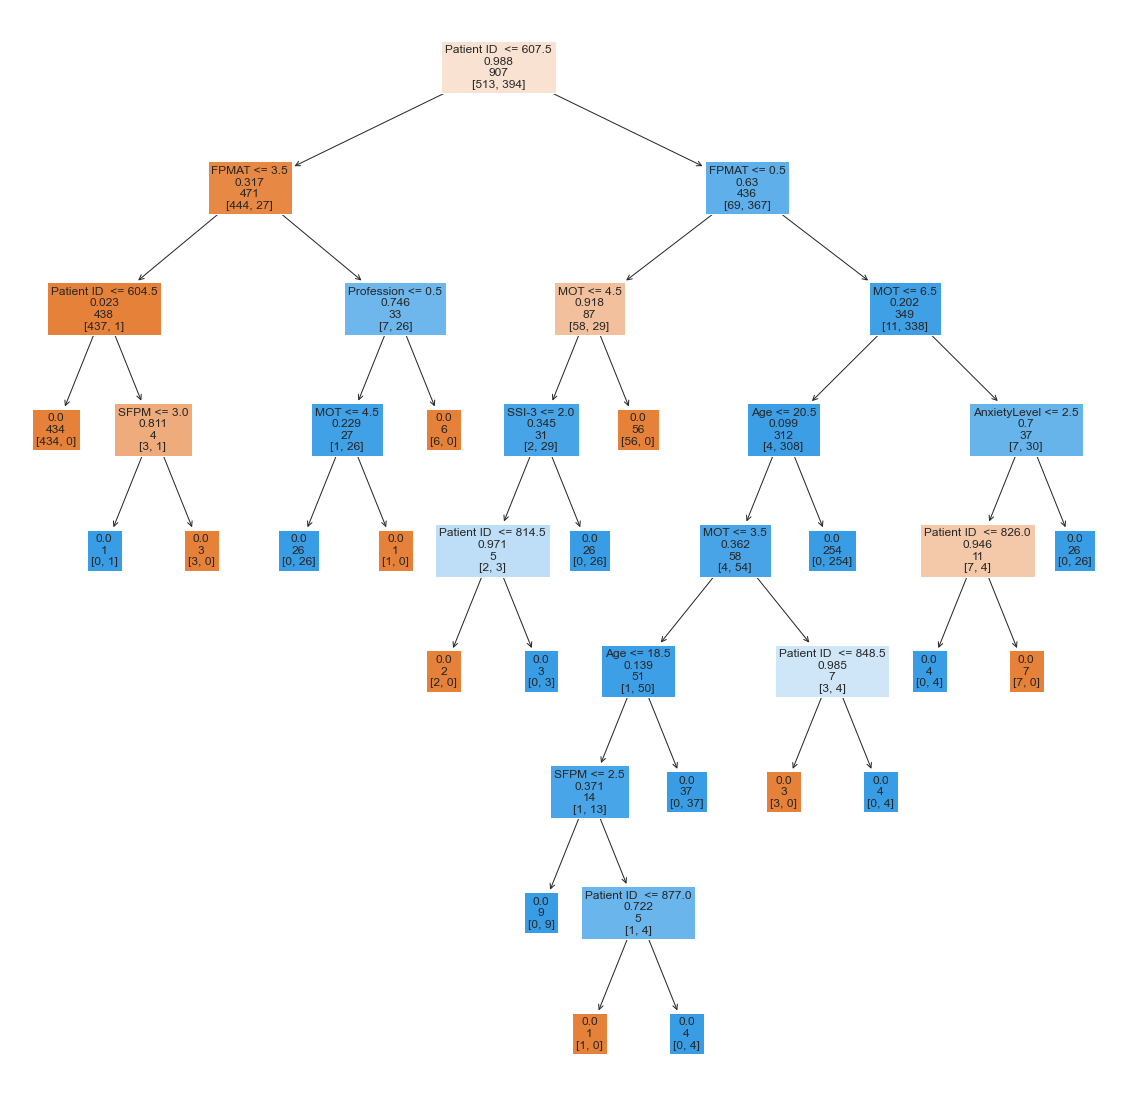

In [45]:
from sklearn.tree import plot_tree, export_text

text_rep = export_text(Decision_model)

fig = plt.figure(figsize=(20,20))
graph = plot_tree(Decision_model, feature_names=list(X.columns), label=list(np.unique(y)), filled=True, fontsize=12)

<AxesSubplot:title={'center':'KNN Model Confusion Metrix'}>

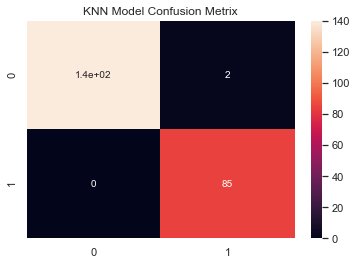

In [46]:
confusion = confusion_matrix(y_test, y_pred_d)
plt.title('KNN Model Confusion Metrix')
sns.heatmap(confusion, annot = True)

<AxesSubplot:title={'center':'Decision Tree Confusion Metrix'}>

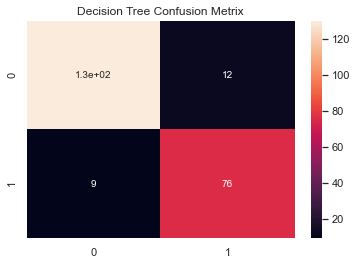

In [47]:
confusion = confusion_matrix(y_test, y_pred)
plt.title('Decision Tree Confusion Metrix')
sns.heatmap(confusion, annot = True)

In [48]:
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       142
           1       0.98      1.00      0.99        85

    accuracy                           0.99       227
   macro avg       0.99      0.99      0.99       227
weighted avg       0.99      0.99      0.99       227



In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       142
           1       0.86      0.89      0.88        85

    accuracy                           0.91       227
   macro avg       0.90      0.90      0.90       227
weighted avg       0.91      0.91      0.91       227



In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9074889867841409


In [51]:
accuracy = accuracy_score(y_test, y_pred_d)
print(accuracy)

0.9911894273127754


In [52]:
en = LabelEncoder()

In [53]:
cols = ['Gender','Profession']
for col in cols:
    df[col] = en.fit_transform(df[col])

In [54]:
x = df.drop('SeverityAfterTherapy', axis = 1)
y = df['SeverityAfterTherapy']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [56]:
model = LogisticRegression(random_state = 0, max_iter = 1000).fit(x_train, y_train)

In [57]:
y_pred = model.predict(x_test)

In [58]:
accuracy_score(y_test, y_pred)

0.8986784140969163

<AxesSubplot:>

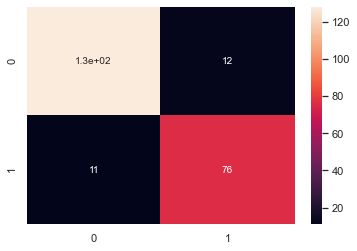

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)